In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df= pd.read_csv('./scv.csv',encoding='cp949')
df

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류
0,2019-01-01 0:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등","풀, 나뭇잎",1,0,1,0,기타,야외,기타야외
1,2019-01-01 0:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,미상,0,0,0,14900,주거,단독주택,단독주택
2,2019-01-01 0:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,미상,0,0,0,3642,"자동차,철도차량",자동차,승용자동차
3,2019-01-01 0:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등","풀, 나뭇잎",0,0,0,1848,기타,야외,야적장
4,2019-01-01 1:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자","전기, 전자기기 기판",0,0,0,45,기타서비스,기타건축물,기타 건축물
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40098,2019-12-31 22:33,경기도,파주시,광탄면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",전선피복,0,0,0,23707,산업시설,공장시설,제재 및 목공업
40099,2019-12-31 22:45,경상북도,경산시,남방동,"건축,구조물",미상,미상,미상,미상,"종이,목재,건초등",건초,0,0,0,3542,산업시설,동식물시설,기타 동식물시설
40100,2019-12-31 22:47,부산광역시,남구,문현동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,튀김유,0,0,0,0,"판매,업무시설",일반업무,오피스텔
40101,2019-12-31 23:05,제주특별자치도,제주시,외도일동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,가연물 근접방치,합성수지,"플라스틱, PVC, 비닐, 장판",0,0,0,105,"판매,업무시설",판매시설,할인점(마트)


In [4]:
gb0 = df.groupby(by='장소대분류')
gb0.sum()

,인명피해(명)소계,사망,부상,재산피해소계
장소대분류,,,,
교육시설,31,2,29,4209031
기타,166,9,157,7633013
기타서비스,61,9,52,10658338
문화재시설,1,0,1,11501
산업시설,318,17,301,345119597
생활서비스,192,5,187,18158352
"선박,항공기",27,1,26,60005851
운수자동차시설,16,1,15,3959347
"위험물,가스제조소",19,1,18,6805927


In [6]:
gb1 =df[(df['장소대분류'] == '교육시설')].groupby(by='장소소분류')
gb1

In [14]:
gb1_gb=gb1.count()
gb1_gb

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류
장소소분류,,,,,,,,,,,,,,,,,
고등학교,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
교육원,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
"기타 연구,학원",14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
기타 학교,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
대학교,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
도서관,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
연구소,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
예체능학원,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
외국어학원,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14


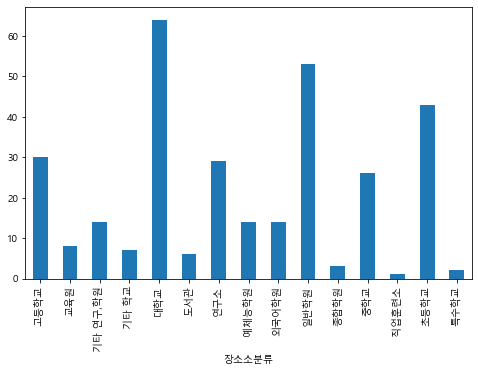

In [22]:
plt.rc('font', family='Malgun Gothic')
gb1_gb['장소대분류'].plot(kind='bar')
plt.rcParams["figure.figsize"] = (8,5)

In [5]:
gb2 =df[(df['장소대분류'] == '기타')].groupby(by='장소소분류')
gb2

In [6]:
gb2_gb=gb2.count()
gb2_gb

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류
장소소분류,,,,,,,,,,,,,,,,,
가로등,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
공터,663,663,663,663,663,663,663,663,663,663,663,663,663,663,663,663,663
기타도로,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
기타야외,2842,2842,2842,2842,2842,2842,2842,2842,2842,2842,2842,2842,2842,2842,2842,2842,2842
모닥불,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
변압기,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
볏짚,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138
쓰레기,2550,2550,2550,2550,2550,2550,2550,2550,2550,2550,2550,2550,2550,2550,2550,2550,2550
야적장,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459


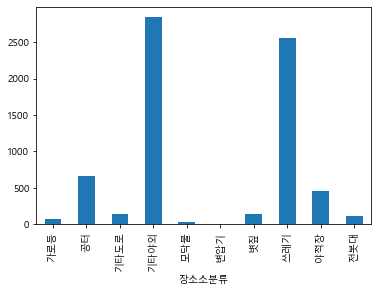

In [7]:
plt.rc('font', family='Malgun Gothic')
gb2_gb['장소대분류'].plot(kind='bar')
plt.rcParams["figure.figsize"] = (8,5)

In [8]:
gb3 =df[(df['장소대분류'] == '기타서비스')].groupby(by='장소소분류')
gb3

In [9]:
gb3_gb=gb3.count()
gb3_gb

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류
장소소분류,,,,,,,,,,,,,,,,,
공중전화박스,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
공중화장실,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
기타 건축물,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742
노상매점,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
포장마차,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


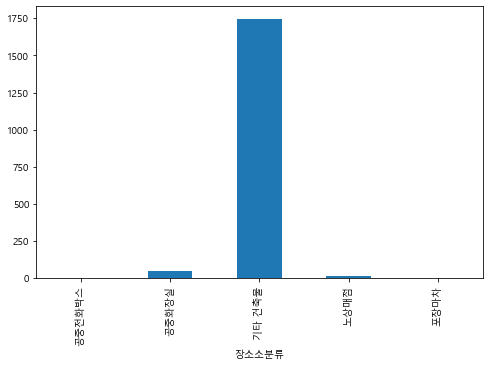

In [10]:
plt.rc('font', family='Malgun Gothic')
gb3_gb['장소대분류'].plot(kind='bar')
plt.rcParams["figure.figsize"] = (8,5)

In [11]:
gb4 =df[(df['장소대분류'] == '문화재시설')].groupby(by='장소소분류')
gb4

In [12]:
gb4_gb=gb4.count()
gb4_gb

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류
장소소분류,,,,,,,,,,,,,,,,,
국가지정문화재,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
기타 문화재,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


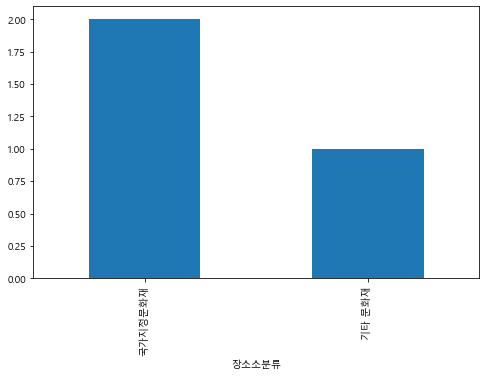

In [13]:
plt.rc('font', family='Malgun Gothic')
gb4_gb['장소대분류'].plot(kind='bar')
plt.rcParams["figure.figsize"] = (8,5)

In [15]:
gb5 =df[(df['장소대분류'] == '산업시설')].groupby(by='장소소분류')
gb5

In [16]:
gb5_gb=gb5.count()
gb5_gb

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류
장소소분류,,,,,,,,,,,,,,,,,
계사,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
"고철처리소, 고물상",44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
공동구,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
공업사,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
광업,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
그 밖의 공업,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691
금속기계 및 기구공업,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736
기타 동식물시설,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253
기타 발전시설,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27


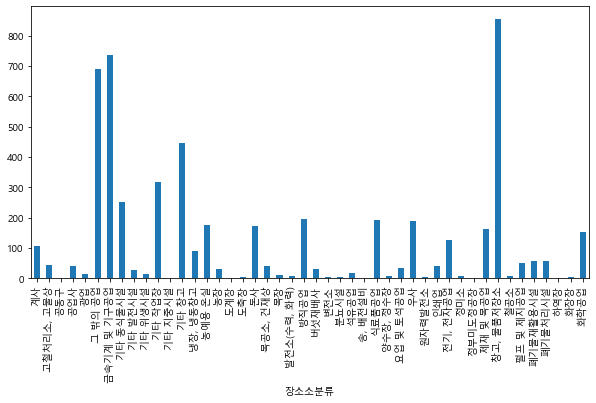

In [19]:
plt.rc('font', family='Malgun Gothic')
gb5_gb['장소대분류'].plot(kind='bar')
plt.rcParams["figure.figsize"] = (10,10)

In [20]:
gb6 =df[(df['장소대분류'] == '생활서비스')].groupby(by='장소소분류')
gb6

In [21]:
gb6_gb=gb6.count()
gb6_gb

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류
장소소분류,,,,,,,,,,,,,,,,,
PC방(인터넷게임제공업),39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
간이음식점,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
간이음식점(휴게),11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
게임제공업,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
고시원(원룸텔),97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
호프집,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
화장품,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
횟집,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222


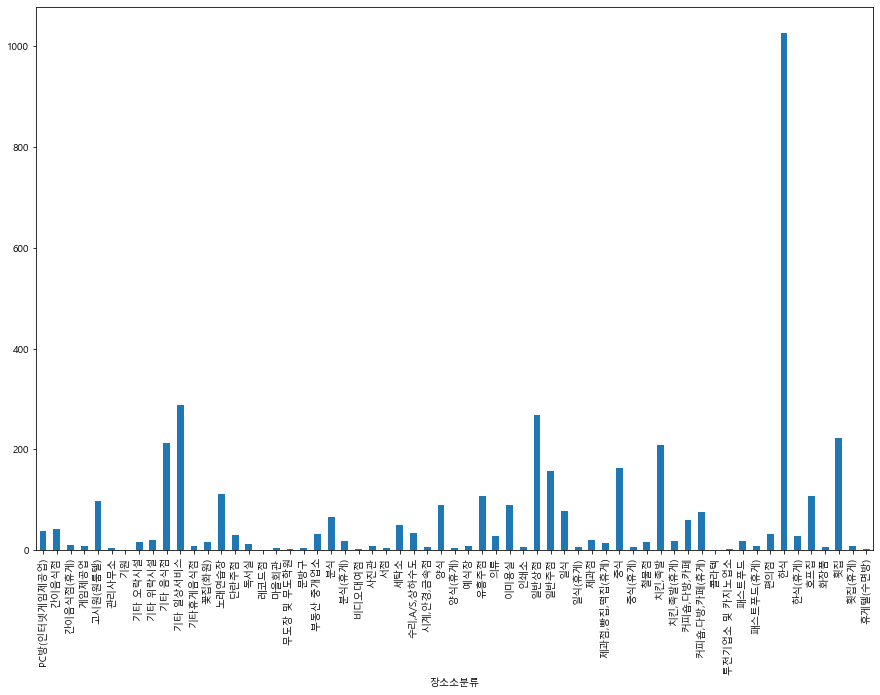

In [26]:
plt.rc('font', family='Malgun Gothic')
gb6_gb['장소대분류'].plot(kind='bar')
plt.rcParams["figure.figsize"] = (10,15)

In [27]:
gb7 =df[(df['장소대분류'] == '선박,항공기')].groupby(by='장소소분류')
gb7

In [28]:
gb7_gb=gb7.count()
gb7_gb

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류
장소소분류,,,,,,,,,,,,,,,,,
기타 선박,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
바지선,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
비행기,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
수상레저기구(보트등),5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
어선,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56
외항선,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
유조선,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
특수작업선(해양관측선등),1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
화물선,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


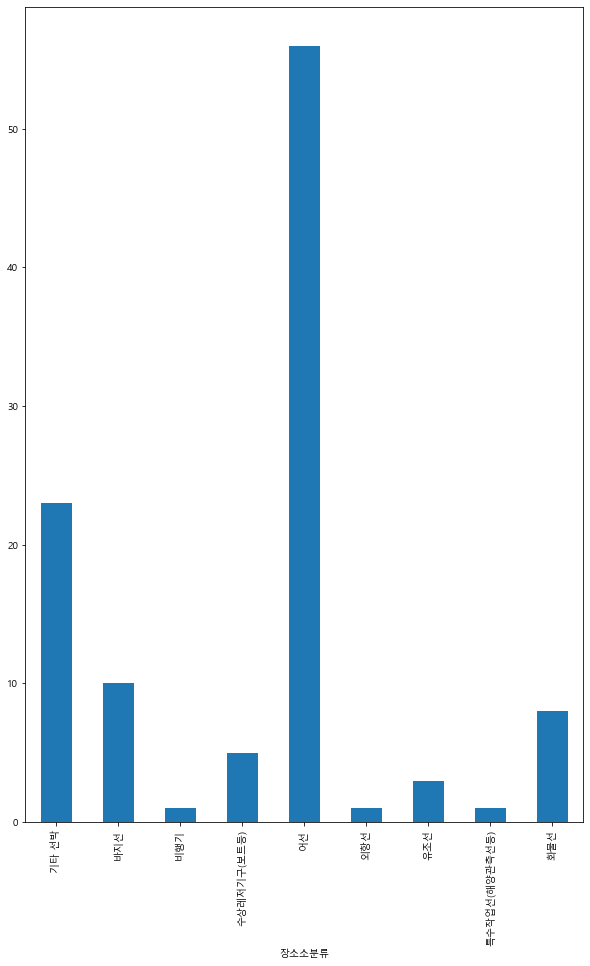

In [29]:
plt.rc('font', family='Malgun Gothic')
gb7_gb['장소대분류'].plot(kind='bar')
plt.rcParams["figure.figsize"] = (8,5)